# #Merging 12 months of data into single file

** https://www.youtube.com/watch?v=M9Itm95JzL0&list=PLFCB5Dp81iNVmuoGIqcT5oF4K-7kTI5vp&index=5

Need to look into it
**  https://www.youtube.com/watch?v=dPwLlJkSHLo

In [ ]:
import pandas as pd
import os

In [267]:
path = r"C:\Users\Lenovo\Desktop\Data_Science\src\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
files = [f for f in os.listdir(path)]

all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+'\\'+ file)
    all_month_data = pd.concat([all_month_data,df])
    
all_month_data.shape



(186850, 6)

**Best month sales and how much

In [269]:
#########  Dropping records which has all null values ###############

#all_month_data = all_month_data[all_month_data['Order ID'].notna()]
#all_month_data.dropna(subset = ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'])
all_month_data = all_month_data.dropna(how = "all") 
all_month_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [270]:
all_month_data['Month'] = all_month_data['Order Date'].str[0:2]
all_month_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [272]:
############# dropping all the records which has Order Date as Order Date. it occurred due to HEADER
all_month_data = all_month_data[all_month_data['Order Date'].str[0:2] !='Or']
all_month_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [ ]:
#####  This statement is not required #####
####temp_data['Month'] = temp_data[temp_data['Order Date'].str[0:2]]

In [287]:
############  creating new column --> Month 
#

all_month_data['Month'] = all_month_data['Month'].astype('int32')
all_month_data.head(3)
temp_data = all_month_data 

In [275]:
#################  Converting Columns to required datatypes ###############

temp_data['Quantity Ordered'] = pd.to_numeric(temp_data['Quantity Ordered'])
temp_data['Price Each'] = pd.to_numeric(temp_data['Price Each'])
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


# Adding sales column ###############

In [276]:
temp_data['Sales'] = temp_data['Quantity Ordered'] * temp_data['Price Each'] 

temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [246]:
######  Getting of sum on monthly basis ############

#temp_data.groupby('Month')['Sales'].sum()
temp_data.groupby('Month')['Sales'].agg(['sum']).\
rename(columns={'sum':'Total_sum'})

,Total_sum
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [277]:
final = temp_data.groupby('Month')['Sales'].agg(['sum']).\
rename(columns={'sum':'Total_sum'})
final

,Total_sum
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [278]:
import matplotlib.pyplot as plt

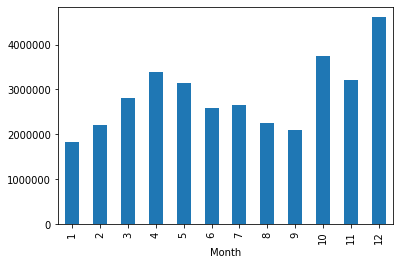

In [279]:
temp_data.groupby('Month')['Sales'].sum().plot(kind='bar')

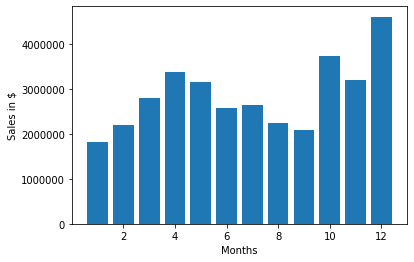

In [280]:
months = range(1,13)
plt.bar(months,final['Total_sum'])
plt.ylabel("Sales in $")
plt.xlabel("Months")
plt.show()

# Which city has more no.of sales

In [ ]:
temp_data.head(3)

In [286]:
######  To get city we can use .apply method ######

temp_data['City'] = temp_data['Purchase Address'].apply(lambda x: x.split(',')[1])
temp_data.head(3)

KeyError: 'Purchase Address'

In [317]:
######  To get city we can use .apply method and fuctions ######

def get_City(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#temp_data['City'] = temp_data['Purchase Address'].apply(lambda x:get_City(x) + ' ('+ get_state(x)+')')
temp_data['City'] = temp_data['Purchase Address'].apply(lambda x: f"{get_City(x)} ({get_state(x)})")
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [313]:
#temp_data = temp_data.groupby('City')['Sales'].agg(['sum']).rename(columns={'sum':'City_Sum'})
new_data = temp_data
new_data= new_data.groupby('City').sum()
new_data.head(3)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06


In [309]:
new_data = new_data.groupby('City')['Sales'].agg(['sum']).rename(columns={'sum':'City_Sum'})
new_data.head(3)

,City_Sum
City,
Atlanta (GA),2.795499e+06
Austin (TX),1.819582e+06
Boston (MA),3.661642e+06


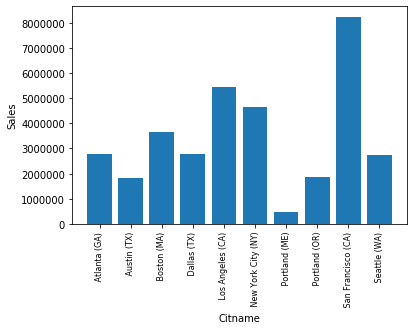

In [315]:
cities = [city for city ,df in new_data.groupby('City') ]  #### this is import
plt.bar(cities,new_data['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales')
plt.xlabel('Citname')
plt.show()

# At what time we should advertitse to get maximum customer buyig product

In [318]:
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [322]:
temp_data['Order Date'] = pd.to_datetime(temp_data['Order Date'])
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [332]:
temp_data['Hour'] = temp_data['Order Date'].dt.hour
temp_data['Minute'] = temp_data['Order Date'].dt.minute
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38


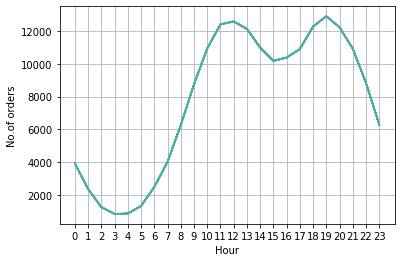

In [345]:
Hours = [hour for hour ,df in temp_data.groupby('Hour') ]
plt.plot(Hours,temp_data.groupby(['Hour']).count())
plt.xticks(Hours)
plt.xlabel('Hour')
plt.ylabel('No.of orders')
plt.grid()
plt.show()
#temp_data.groupby('Hour').sum()

# What products are most often sold togather

In [346]:
temp_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38


In [360]:
df_dupli = temp_data[temp_data['Order ID'].duplicated(keep=False)]

df_dupli['grouped'] = df_dupli.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_dupli.head(3)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"


In [368]:
df_dupli_final = df_dupli[['Order ID','grouped']].drop_duplicates()
df_dupli_final.head(2)

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"


In [374]:
df_dupli_final.groupby('grouped').count()

,Order ID
grouped,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


In [370]:
from itertools import combinations
from collections import Counter

In [376]:
count=Counter()
for row in df_dupli_final['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common():
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

# what product sold most and why it sold most

Text(0.5, 0, 'Products')

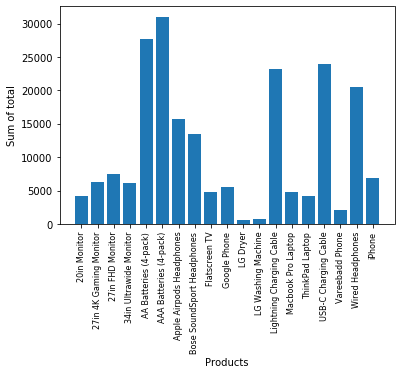

In [388]:
#product_group = temp_data.groupby('Product')['Quantity Ordered'].sum()
product_group = temp_data.groupby('Product')
quan_ord = product_group.sum()['Quantity Ordered']

Products = [product for product, df in product_group]

plt.bar(Products,quan_ord)
plt.xticks(Products,rotation='vertical',size=8)
plt.ylabel('Sum of total')
plt.xlabel('Products')





In [390]:
prices = temp_data.groupby('Product')['Price Each'].mean()

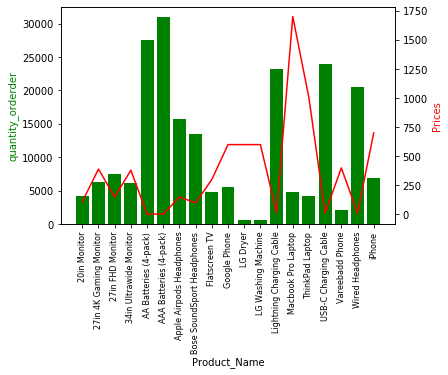

In [395]:
fig ,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Products,quan_ord,color='g')
ax2.plot(Products,prices,'b-',color='r')

ax1.set_xlabel('Product_Name')
ax1.set_ylabel('quantity_orderder',color = 'g')
ax2.set_ylabel('Prices',color = 'r')
ax1.set_xticklabels(Products,rotation='vertical',size=8)
plt.show()